# What relationships exists between wildfire emissions and air quality?

_This is an EDA notebook. Other notebooks, including for scraping / data acquisition, cleaning, merging and modeling, can be found in the same `/code/` folder._

Our team:

* Helen Meigs
* Veronica Antonova
* Riley Robertson

Let's start with all the required library imports to read in and analyze our data.

In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, \
numpy as np

We have several major areas requiring analysis:

1. Air pollution / quality data
2. Fire and smoke data

## Terminology

* AQI: air quality index; measured from Good (Green) to Hazardous (Purple).

* Prescribed fire: abbreviated 'rx'; a planned fire executed by Tribal, Federal, State, and county agencies to meet management objectives. Rx fires are used to benefit natural resource management, get rid of excessive fuel loads before they become a bonafide wildfires, and research.

* Wildfire: an uncontrolled burn, originating in wildlands or rural areas (ie not a car burning on a Gotham street corner)

* Smoke score: a classification of light, medium, or heavy corresponding to the density of smoke coverage derived from NOAA's Hazard Mapping Systems satellite imaging (<=5%, 16%, and 27%+, respectively)

## Pollution

Questions to be answered:

* Relationship in the max / peak time of the different pollutants


Let's read in our data.

* Pollution dataset source: https://www.kaggle.com/sogun3/uspollution
* PM2.5 dataset source: Kaggle

In [2]:
#syntactic ref from https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
pollution = pd.read_csv(
    '../data/pollution/pollution_us_2000_2016.csv',#, index_col = 'Unnamed:0')
usecols=['State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
)

### Pollution dataset exploration

Let's understand the structure of our files.

In [3]:
pollution.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [4]:
pollution.dtypes

State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

We have a few columns acting as numeric, when they are not; let's convert them.

In [5]:
#from docstring: df.astype({'col1': 'int32'}).dtypes
pollution['State Code'] = pollution.astype(
    {'State Code': 'category'}).dtypes

In [6]:
pollution['County Code'] = pollution.astype(
    {'County Code': 'category'}).dtypes

In [7]:
pollution['Site Num'] = pollution.astype(
    {'Site Num': 'category'}).dtypes

In [8]:
#confirm types now
pollution.dtypes

State Code            object
County Code           object
Site Num              object
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object

How big is our data?

In [9]:
pollution.shape

(1746661, 28)

In [10]:
pollution.drop_duplicates(inplace=True)

Let's see, what's inside our data.

In [11]:
pollution.head(2).T

,0,1
State Code,NaN,NaN
County Code,NaN,NaN
Site Num,NaN,NaN
Address,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN
State,Arizona,Arizona
County,Maricopa,Maricopa
City,Phoenix,Phoenix
Date Local,2000-01-01,2000-01-01
NO2 Units,Parts per billion,Parts per billion
NO2 Mean,19.0417,19.0417


In [12]:
pollution.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
NO2 Mean,1741629.0,12.8222,9.5091,-2.0000,5.7500,10.7391,17.7143,139.5417
NO2 1st Max Value,1741629.0,25.4111,15.9996,-2.0000,13.0000,24.0000,35.6000,267.0000
NO2 1st Max Hour,1741629.0,11.7281,7.8766,0.0000,5.0000,9.0000,20.0000,23.0000
NO2 AQI,1741629.0,23.8946,15.1613,0.0000,12.0000,23.0000,33.0000,132.0000
O3 Mean,1741629.0,0.0261,0.0114,0.0000,0.0179,0.0259,0.0339,0.0951
O3 1st Max Value,1741629.0,0.0392,0.0153,0.0000,0.0290,0.0380,0.0480,0.1410
O3 1st Max Hour,1741629.0,10.1679,4.0020,0.0000,9.0000,10.0000,11.0000,23.0000
O3 AQI,1741629.0,36.0363,19.7428,0.0000,25.0000,33.0000,42.0000,218.0000
SO2 Mean,1741629.0,1.8722,2.7626,-2.0000,0.2571,0.9875,2.3286,321.6250
SO2 1st Max Value,1741629.0,4.4963,7.6855,-2.0000,0.9000,2.0000,5.0000,351.0000


Which states have the most emissions?

In [13]:
pollution['State'].value_counts()

California              575628
Pennsylvania            188764
Texas                   120485
New York                 70487
Arizona                  69840
Illinois                 50112
North Carolina           37062
Virginia                 36422
Colorado                 35124
Arkansas                 35117
Oklahoma                 34420
Kansas                   31480
Connecticut              29933
New Jersey               26668
Florida                  25902
District Of Columbia     25696
Iowa                     25270
Louisiana                23874
Maine                    23623
Maryland                 23538
Ohio                     22882
Massachusetts            21020
Hawaii                   20274
Missouri                 19778
Kentucky                 14678
Indiana                  13926
Wyoming                  13048
Oregon                   11794
North Dakota             11018
Nevada                    9678
Country Of Mexico         9506
New Hampshire             9294
Utah    

Most of our emissions are found in the following:

California              
Pennsylvania            
Texas                   
New York                 
Arizona

However, for purposes, we are going to concentrate on states west of the Rocky mountains.

State lines are superficial for purposes of understanding movement of fires. So the idea here is that the Rockies provide a better 'line' for us to make a cutoff, since they really do break airflow, and there will be drastically different air-quality and pollution-scapes to the east v. west.

### Particulate matter dataset

We will repeat the initial file review steps for the PM dataset as well.

In [14]:
#pull in file
pm = pd.read_csv('../data/pollution/pm2.5_epa_2010_2017.csv')

In [15]:
#peek
pm.head(3)

,state_code,county_code,site_num,parameter_code,poc,latitude,longitude,datum,parameter_name,sample_duration,...,aqi,method_code,method_name,local_site_name,address,state_name,county_name,city_name,cbsa_name,date_of_last_change
0,6,83,9000,88128,1,34.733889,-120.008349,WGS84,Lead PM2.5 LC,24 HOUR,...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,San Rafael Wilderness,San Rafael,California,Santa Barbara,Not in a city,Santa Maria-Santa Barbara CA,2016-08-30
1,49,17,101,88132,1,37.618383,-112.174368,WGS84,Manganese PM2.5 LC,24 HOUR,...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,NaN,Bryce Canyon NP,Utah,Garfield,Not in a city,NaN,2015-07-28
2,16,23,101,88136,1,43.460556,-113.562222,WGS84,Nickel PM2.5 LC,24 HOUR,...,NaN,800,IMPROVE Module A with Cyclone Inlet-Teflon Fil...,Craters of the Moon National Monument Visitor ...,CRATERS OF THE MOON NATIONAL MON IDAHO,Idaho,Butte,Not in a city,Idaho Falls ID,2015-07-31


_Use [Census coding](https://www2.census.gov/programs-surveys/decennial/2010/partners/pdf/FIPS_StateCounty_Code.pdf) to decipher state and county code data._

In [16]:
#shape
pm.shape

(338926, 29)

In [17]:
pm.drop_duplicates(inplace=True)

In [18]:
#dtypes
pm.dtypes

state_code               int64
county_code              int64
site_num                 int64
parameter_code           int64
poc                      int64
latitude               float64
longitude              float64
datum                   object
parameter_name          object
sample_duration         object
pollutant_standard     float64
date_local              object
units_of_measure        object
event_type              object
observation_count        int64
observation_percent    float64
arithmetic_mean        float64
first_max_value        float64
first_max_hour           int64
aqi                    float64
method_code              int64
method_name             object
local_site_name         object
address                 object
state_name              object
county_name             object
city_name               object
cbsa_name               object
date_of_last_change     object
dtype: object

In [19]:
#conversions
pm['state_code'] = pm.astype(
    {'state_code': 'category'}).dtypes

In [20]:
pm['county_code'] = pm.astype(
    {'county_code': 'category'}).dtypes

In [21]:
pm['site_num'] = pm.astype(
    {'site_num': 'category'}).dtypes

In [22]:
pm['parameter_code'] = pm.astype(
    {'parameter_code': 'category'}).dtypes

In [23]:
pm['poc'] = pm.astype(
    {'poc': 'category'}).dtypes

In [24]:
#confirm types
pm.dtypes

state_code              object
county_code             object
site_num                object
parameter_code          object
poc                     object
latitude               float64
longitude              float64
datum                   object
parameter_name          object
sample_duration         object
pollutant_standard     float64
date_local              object
units_of_measure        object
event_type              object
observation_count        int64
observation_percent    float64
arithmetic_mean        float64
first_max_value        float64
first_max_hour           int64
aqi                    float64
method_code              int64
method_name             object
local_site_name         object
address                 object
state_name              object
county_name             object
city_name               object
cbsa_name               object
date_of_last_change     object
dtype: object

In [25]:
#desc stats
pm.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
latitude,338926.0,38.8288,5.0309,31.3374,34.1939,37.6875,42.9099,48.7314
longitude,338926.0,-117.5479,4.3689,-124.6249,-121.4271,-118.8248,-112.8010,-109.3891
pollutant_standard,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
observation_count,338926.0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
observation_percent,338926.0,100.0000,0.0000,100.0000,100.0000,100.0000,100.0000,100.0000
arithmetic_mean,338926.0,0.0009,0.0107,-0.0140,0.0000,0.0000,0.0010,5.0000
first_max_value,338926.0,0.0009,0.0107,-0.0140,0.0000,0.0000,0.0010,5.0000
first_max_hour,338926.0,0.0004,0.0714,0.0000,0.0000,0.0000,0.0000,12.0000
aqi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
method_code,338926.0,803.9735,6.1617,800.0000,800.0000,800.0000,811.0000,884.0000


_We abandoned looking at invidivual pollutants at this stage._

## Fire and smoke

Questions to be answered:

* Number of prescribed fires vs. wildfires per state, per year --> trends over years?  trends change over years in a certain state?  does more prescribed burns necessarily equal fewer wildfires?

* similar to above, but # acres instead of count

* map counties with the worst smoke_score (most days of smoke_score=3) -- same counties hit every year?  or totally random?

* Looking at similiar-size fires and their impacts throughout time

Note on data: data may include international locations.

Data source: fire resarch contact, Cristobal Martinez, cpaismz@berkeley.edu.

_Additional information about some of the calculations around fire perimeters can be found at this [source](https://frap.fire.ca.gov/frap-projects/fire-perimeters/)._

In [28]:
#pull in data
smoke = pd.read_csv(
    '../data/fire/MTBS_merge_smoke_inProgress.csv')

In [29]:
also_smoke = pd.read_csv('../data/model_data.csv')

In [30]:
#peek
smoke.head()

,state,county_name,date,smoke_score,lat_smo,lon_smo,event_id,incid_name,incid_type,asmnt_type,...,burnbndlon,nodata_t,incgreen_t,low_t,mod_t,high_t,lon_wf,lat_wf,reverse_geocode,state_full
0,AZ,Gila County,20100604,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AZ,Gila County,20100606,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AZ,Gila County,20100624,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZ,Gila County,20100627,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZ,Gila County,20100713,1.0,33.799665,-110.811659,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#grasp the size of data
smoke.shape

(67561, 22)

In [32]:
smoke.drop_duplicates(inplace=True)

In [33]:
#look at data types
smoke.dtypes

state               object
county_name         object
date                 int64
smoke_score        float64
lat_smo            float64
lon_smo            float64
event_id            object
incid_name          object
incid_type          object
asmnt_type          object
burnbndac          float64
burnbndlat         float64
burnbndlon         float64
nodata_t           float64
incgreen_t         float64
low_t              float64
mod_t              float64
high_t             float64
lon_wf             float64
lat_wf             float64
reverse_geocode     object
state_full          object
dtype: object

Let's convert date to the correct type.

In [34]:
smoke['date'] = pd.to_datetime(\
       smoke['date'], format='%Y%m%d', errors='ignore')

Note: `burnbndac` refers to acres within the burn boundaries.

What types of fires do we have?

In [35]:
#understand the data some more
smoke['incid_type'].value_counts()

Wildfire           1875
Prescribed Fire     114
Unknown              17
Name: incid_type, dtype: int64

In [36]:
smoke['incid_type'].value_counts(normalize=True).round(2)

Wildfire           0.93
Prescribed Fire    0.06
Unknown            0.01
Name: incid_type, dtype: float64

As expected based on our initial investigation (offline), we have two types of fire: Wildfire and Prescribed. Per [source](https://www.nps.gov/articles/what-is-a-prescribed-fire.htm), a prescribed fire is a planned fire and an important forestry management techniuqe. Specifically:

"Prescribed fire is one of the most important tools used to manage fire today. A scientific prescription for each fire, prepared in advance, describes its objectives, fuels, size, the precise environmental conditions under which it will burn, and conditions under which it may be suppressed. The fire may be designed to create a mosaic of diverse habitats for plants and animals, to help endangered species recover, or to reduce fuels and thereby prevent a destructive fire."

In [37]:
#drop unknown fire types
#df = df.drop(df[<some boolean condition>].index) from https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

smoke.drop(
    smoke[smoke['incid_type'] == 'Unknown'].index,
    inplace=True)


Let's further check out and understand the types of fire.

In [38]:
smoke['asmnt_type'].value_counts()

Initial          1143
Extended          779
Initial (SS)       59
Extended (SS)       8
Name: asmnt_type, dtype: int64

How big are fires?

In [39]:
smoke['smoke_score'].value_counts(
    normalize=True).round(2)

1.0    0.70
2.0    0.23
3.0    0.08
Name: smoke_score, dtype: float64

In [40]:
also_smoke.columns

Index(['state', 'county_name', 'date', 'incid_type', 'yes_fire', 'burnbndac',
       'smoke_score', 'no2_max_ppb', 'no2_aqi_label', 'o3_max_ppb',
       'o3_aqi_label', 'so2_max_ppb', 'so2_aqi_label', 'co_max_ppm',
       'co_aqi_label', 'incid_name', 'event_id', 'burnbndlat', 'burnbndlon',
       'lat_smo', 'lon_smo', 'no2_aqi_num', 'o3_aqi_num', 'so2_aqi_num',
       'co_aqi_num', 'overall_aqi', 'any_lat', 'any_lon', 'cluster',
       'class_g'],
      dtype='object')

In [41]:
also_smoke['yes_fire'].value_counts()

0.0    45433
1.0    43048
Name: yes_fire, dtype: int64

In [45]:
subset_df = also_smoke.loc[also_smoke['yes_fire'] == 1]
cols = subset_df.columns
cols

Index(['state', 'county_name', 'date', 'incid_type', 'yes_fire', 'burnbndac',
       'smoke_score', 'no2_max_ppb', 'no2_aqi_label', 'o3_max_ppb',
       'o3_aqi_label', 'so2_max_ppb', 'so2_aqi_label', 'co_max_ppm',
       'co_aqi_label', 'incid_name', 'event_id', 'burnbndlat', 'burnbndlon',
       'lat_smo', 'lon_smo', 'no2_aqi_num', 'o3_aqi_num', 'so2_aqi_num',
       'co_aqi_num', 'overall_aqi', 'any_lat', 'any_lon', 'cluster',
       'class_g'],
      dtype='object')

In [46]:
grouped = pd.DataFrame(subset_df.groupby([
    'smoke_score', 'incid_type'])['burnbndac'].agg(
    ['mean', 'count']))
grouped

mean  count
smoke_score incid_type                         
1.0         Prescribed Fire   393.044346    451
            Wildfire          488.651959  24908
4.0         Prescribed Fire   416.735849    159
            Wildfire          753.506510  11751
9.0         Prescribed Fire   411.461538     52
            Wildfire         1216.923061   4965

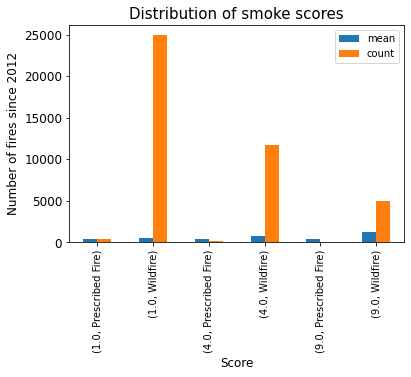

In [47]:
#dist of smoke scores
grouped.plot(kind='bar');
plt.title('Distribution of smoke scores', size = 15)
plt.xlabel('Score', size = 12);
plt.ylabel('Number of fires since 2012', size = 12);
#plt.xticks([1.00, 2.00, 3.00]);
plt.yticks(size=12)
#plt.savefig('../assets/fires_by_score.jpg');

The vast majority of fires score between 1 and 1.2. Just under 1/3rd of fires score a 2 or more.

Most days of the year there is no smoke -- [0 to 5] -- _pull for only when there are fires._ (filter on event ID - basic) - or use the is_fire eng. (impact of ignition dates vs. duration)

~Light 

Let's understand the size of the fires.

In [48]:
#frequency of fire by state
smoke['state'].value_counts()

CA    19035
ID    13837
OR    12072
WA    11370
UT     4177
NV     3494
AZ     3401
MT       97
WY       42
NM       14
CO        5
Name: state, dtype: int64

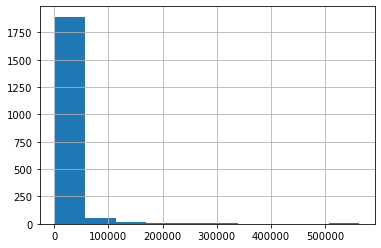

In [49]:
#by acreage
smoke['burnbndac'].hist();

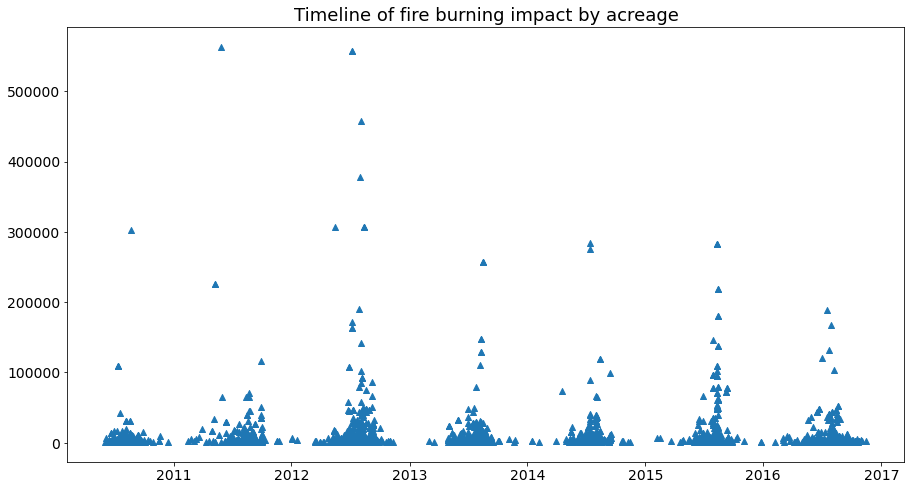

In [50]:
#timelapse

plt.figure(figsize = (15,8))
plt.scatter(smoke['date'], smoke['burnbndac'], marker = '^');
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Timeline of fire burning impact by acreage', size=18);
plt.savefig('../assets/fire_by_acreage.jpg');

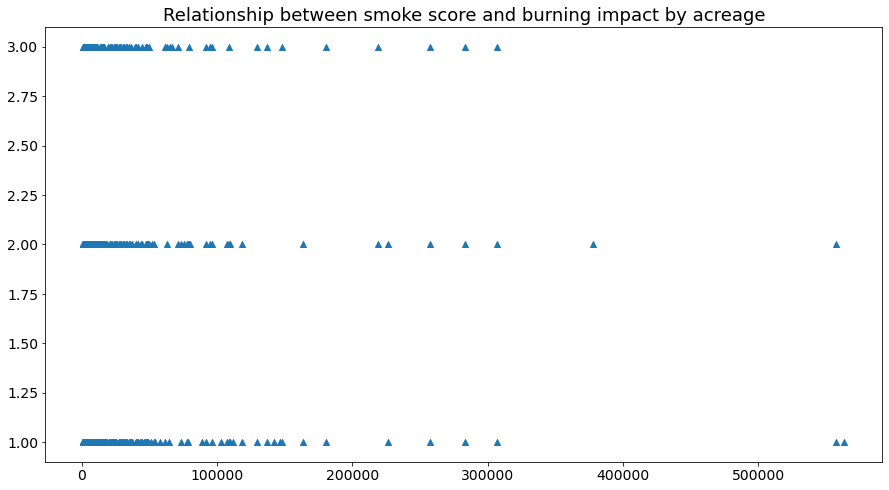

In [51]:
#scatter by smoke score to acreage
plt.figure(figsize = (15,8))
plt.scatter(smoke['burnbndac'], smoke['smoke_score'], marker = '^');
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Relationship between smoke score and burning impact by acreage', size=18);


There seems to be no relationship we can see between the smoke score and acreage.

## Putting it all together

Let's look at just the states of interest and see if there are any insights to draw when we pull together pollution and fire data.

In [53]:
#pull in merged file
merged = pd.read_csv(
    '../data/matched_smoke_fire_pollution_CORRECT.csv')

In [54]:
#clean out dupes
merged.drop_duplicates(inplace=True)

Because of the way the data were merged, we _expect_ many nulls. This is because not every air quality measurement will have corresponding fire data, as an example.

In [55]:
merged.head(2).T

,0,1
state,AZ,AZ
city,NaN,NaN
county_name,Gila County,Gila County
date,20100604,20100606
incid_type,NaN,NaN
burnbndac,NaN,NaN
smoke_score,1,1
no2_max_ppb,NaN,NaN
no2_aqi_label,NaN,NaN
o3_max_ppb,NaN,NaN


In [56]:
#confirm the locations
pd.DataFrame(merged['state'].value_counts())

,state
CA,29054
WA,15717
OR,15541
ID,15359
NV,4748
UT,4216
AZ,3710
MT,88
WY,33
NM,11


In [57]:
merged.shape

(88481, 24)

In [58]:
merged.columns

Index(['state', 'city', 'county_name', 'date', 'incid_type', 'burnbndac',
       'smoke_score', 'no2_max_ppb', 'no2_aqi_label', 'o3_max_ppb',
       'o3_aqi_label', 'so2_max_ppb', 'so2_aqi_label', 'co_max_ppm',
       'co_aqi_label', 'incid_name', 'event_id', 'burnbndlat', 'burnbndlon',
       'lat_smo', 'lon_smo', 'aqi_address', 'geometry_wf',
       'reverse_geocode_fire_ig'],
      dtype='object')

In [59]:
#check types
merged.dtypes

state                       object
city                        object
county_name                 object
date                         int64
incid_type                  object
burnbndac                  float64
smoke_score                float64
no2_max_ppb                float64
no2_aqi_label               object
o3_max_ppb                 float64
o3_aqi_label                object
so2_max_ppb                float64
so2_aqi_label               object
co_max_ppm                 float64
co_aqi_label                object
incid_name                  object
event_id                    object
burnbndlat                 float64
burnbndlon                 float64
lat_smo                    float64
lon_smo                    float64
aqi_address                 object
geometry_wf                 object
reverse_geocode_fire_ig     object
dtype: object

### Data wrangling and some feature eng

In [60]:
#convert dates to datetime format - from docstring:
#pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

merged['date'] = pd.to_datetime(\
       merged['date'], format='%Y%m%d', errors='ignore')

In [61]:
#Feature eng from Helen
overall_aqi_dict = {'good':1, 'moderate':2, 'unhealthy for at-risk':4, 'unhealthy': 4,
                   'very unhealthy':5, 'hazardous':5, 0:0}

poll_cols = [
    'no2_aqi_label', 'o3_aqi_label', 'so2_aqi_label', 'co_aqi_label']

poll = ['no2', 'o3', 'so2', 'co']

zipper = list(zip(poll_cols, poll))

for i in poll_cols:
    merged[i] = merged[i].fillna(0)
    
for i,j in zipper:
    merged[j+'_aqi_num'] = merged[i].map(overall_aqi_dict)

merged['overall_aqi'] = merged[
    'no2_aqi_num'] * merged[
    'so2_aqi_num'] * merged['o3_aqi_num'] * merged['co_aqi_num']

In [62]:
#confirm conversion
merged.dtypes

state                              object
city                               object
county_name                        object
date                       datetime64[ns]
incid_type                         object
burnbndac                         float64
smoke_score                       float64
no2_max_ppb                       float64
no2_aqi_label                      object
o3_max_ppb                        float64
o3_aqi_label                       object
so2_max_ppb                       float64
so2_aqi_label                      object
co_max_ppm                        float64
co_aqi_label                       object
incid_name                         object
event_id                           object
burnbndlat                        float64
burnbndlon                        float64
lat_smo                           float64
lon_smo                           float64
aqi_address                        object
geometry_wf                        object
reverse_geocode_fire_ig           

In [63]:
merged.head(2)

,state,city,county_name,date,incid_type,burnbndac,smoke_score,no2_max_ppb,no2_aqi_label,o3_max_ppb,...,lat_smo,lon_smo,aqi_address,geometry_wf,reverse_geocode_fire_ig,no2_aqi_num,o3_aqi_num,so2_aqi_num,co_aqi_num,overall_aqi
0,AZ,NaN,Gila County,2010-06-04,NaN,NaN,1.0,NaN,0,NaN,...,33.799665,-110.811659,NaN,NaN,NaN,0,0,0,0,0
1,AZ,NaN,Gila County,2010-06-06,NaN,NaN,1.0,NaN,0,NaN,...,33.799665,-110.811659,NaN,NaN,NaN,0,0,0,0,0


In [64]:
merged.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
burnbndac,2437.0,14387.64,37577.50,1001.00,1877.00,3509.00,12720.00,563664.00
smoke_score,87719.0,1.39,0.63,1.00,1.00,1.00,2.00,3.00
no2_max_ppb,19578.0,22.40,16.12,0.00,9.00,20.00,33.00,135.90
o3_max_ppb,19578.0,47.29,18.62,3.00,32.00,46.00,61.00,122.00
so2_max_ppb,19578.0,1.27,2.29,-0.90,0.40,0.90,1.60,86.90
co_max_ppm,19578.0,0.50,0.43,-0.10,0.29,0.40,0.60,8.30
burnbndlat,2437.0,40.21,5.10,31.30,34.67,40.84,44.47,48.98
burnbndlon,2437.0,-116.91,3.73,-124.09,-119.67,-117.36,-114.46,-108.51
lat_smo,87719.0,41.56,4.46,31.53,38.07,42.30,45.40,48.83
lon_smo,87719.0,-118.48,3.77,-124.16,-121.69,-119.01,-115.99,-109.24


### Analyze relationships

In [65]:
merged.corr()

,burnbndac,smoke_score,no2_max_ppb,o3_max_ppb,so2_max_ppb,co_max_ppm,burnbndlat,burnbndlon,lat_smo,lon_smo,no2_aqi_num,o3_aqi_num,so2_aqi_num,co_aqi_num,overall_aqi
burnbndac,1.000000,0.058742,-0.209764,0.080947,-0.066690,-0.174319,0.059735,-0.050090,0.073267,-0.028061,-0.074356,-0.045346,-0.069256,-0.069256,-0.049165
smoke_score,0.058742,1.000000,-0.029252,0.037309,-0.021447,-0.053299,0.080524,-0.089088,0.086189,-0.016486,-0.040454,-0.014110,-0.040874,-0.041278,-0.013019
no2_max_ppb,-0.209764,-0.029252,1.000000,0.367534,0.202839,0.572001,-0.219219,0.102013,-0.370291,0.380060,0.520537,0.282882,0.002656,0.062680,0.388645
o3_max_ppb,0.080947,0.037309,0.367534,1.000000,0.094205,0.030009,-0.236601,0.345173,-0.377275,0.441588,0.064385,0.824599,0.049493,-0.000263,0.707686
so2_max_ppb,-0.066690,-0.021447,0.202839,0.094205,1.000000,0.355788,-0.060055,-0.032350,-0.081702,0.024940,0.113041,0.081435,0.772272,0.293205,0.348946
co_max_ppm,-0.174319,-0.053299,0.572001,0.030009,0.355788,1.000000,-0.141504,0.001657,-0.241707,0.179790,0.349337,0.033324,0.275307,0.405384,0.243374
burnbndlat,0.059735,0.080524,-0.219219,-0.236601,-0.060055,-0.141504,1.000000,-0.236247,0.938681,-0.258364,-0.599301,-0.521385,-0.617963,-0.617963,-0.519090
burnbndlon,-0.050090,-0.089088,0.102013,0.345173,-0.032350,0.001657,-0.236247,1.000000,-0.222649,0.820262,-0.072038,-0.020553,-0.075868,-0.075868,-0.014776
lat_smo,0.073267,0.086189,-0.370291,-0.377275,-0.081702,-0.241707,0.938681,-0.222649,1.000000,-0.243873,-0.534123,-0.491725,-0.535242,-0.536278,-0.467734
lon_smo,-0.028061,-0.016486,0.380060,0.441588,0.024940,0.179790,-0.258364,0.820262,-0.243873,1.000000,-0.023846,0.041796,-0.032633,-0.032673,0.047370


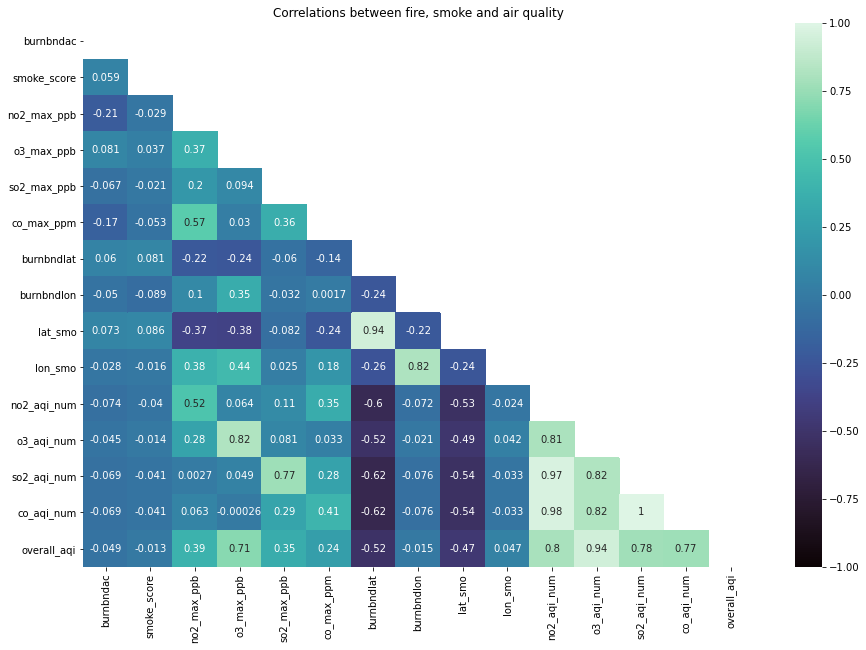

In [66]:
#corr heatmap
plt.figure(figsize=(15,10))
mask=np.zeros_like(merged.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(merged.corr(), cmap='mako', annot=True, mask=mask,
           vmin=-1, vmax=1);
plt.title('Correlations between fire, smoke and air quality')
plt.savefig('../assets/heatmap.png')

In [ ]:
#relationships
#pairplot

sns.pairplot(merged)
plt.title('Relationships between air, fire, and smoke')
#plt.savefig('../assets/pairplot.png');

From the pairplot, we see potential relationships between:

* no2_max_ppb and co_max_ppm
* burnbndlat and lat_smo (burn and smoke latitude)
* burnbndlon and lon_smo (burn and smoke longitude)

In addition, from the heatmap, the following have the strongest correlations:

* no2 AQI and so2 AQI,
* co2 AQI and no2 AQI
* co AQI and o3 AQI
* no2_max and burning acreage

It is not suprising that different pollutants in the air would have a connection, and it's even more interesting that they may interact.